Air Quality Index Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('station_day.csv')


In [3]:
data.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [4]:
data.shape

(39326, 16)

In [5]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,31262.000000,26858.000000,32298.000000,32604.000000,33499.000000,22605.000000,32526.000000,26414.000000,31052.000000,27310.000000,26184.000000,8767.000000,30643.000000
mean,104.073943,202.936093,31.052122,42.493562,51.443323,35.753607,1.400216,14.415184,40.275250,3.078127,20.560200,2.336347,226.050974
std,85.969802,137.170384,41.326855,32.535816,54.634660,25.354357,1.927010,9.947424,48.198637,4.595481,33.478727,6.089709,131.098983
min,0.480000,1.000000,0.010000,0.010000,0.000000,0.010000,0.000000,0.040000,0.020000,0.000000,0.000000,0.000000,21.000000
25%,45.040000,100.012500,6.630000,20.630000,17.380000,20.170000,0.640000,7.460000,18.920000,0.380000,1.410000,0.000000,116.000000
50%,77.135000,169.990000,15.650000,33.790000,33.810000,31.320000,1.050000,12.100000,30.470000,1.830000,8.010000,0.450000,198.000000
75%,135.357500,273.162500,36.060000,55.230000,63.425000,45.370000,1.640000,18.710000,46.460000,4.260000,25.420000,2.320000,319.000000
max,916.670000,1000.000000,429.770000,397.770000,453.610000,418.900000,48.350000,130.160000,963.000000,185.470000,396.870000,170.370000,1019.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39326 entries, 0 to 39325
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StationId   39326 non-null  object 
 1   Date        39326 non-null  object 
 2   PM2.5       31262 non-null  float64
 3   PM10        26858 non-null  float64
 4   NO          32298 non-null  float64
 5   NO2         32604 non-null  float64
 6   NOx         33499 non-null  float64
 7   NH3         22605 non-null  float64
 8   CO          32526 non-null  float64
 9   SO2         26414 non-null  float64
 10  O3          31052 non-null  float64
 11  Benzene     27310 non-null  float64
 12  Toluene     26184 non-null  float64
 13  Xylene      8767 non-null   float64
 14  AQI         30643 non-null  float64
 15  AQI_Bucket  30643 non-null  object 
dtypes: float64(13), object(3)
memory usage: 4.8+ MB


In [7]:
data.isnull().sum()

,0
StationId,0
Date,0
PM2.5,8064
PM10,12468
NO,7028
NO2,6722
NOx,5827
NH3,16721
CO,6800
SO2,12912


In [8]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.median()))


In [9]:
data.sort_values('Date', inplace=True)
data.interpolate(method='linear', inplace=True)


<ipython-input-9-ba387a5dd913>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(method='linear', inplace=True)


In [10]:
data.drop(columns=['Xylene'], inplace=True)

# Data Cleaning

In [11]:
# Data Cleaning
def clean_data(data):
    """Cleans the dataset by handling missing values and invalid data."""
    # Convert 'Date' to datetime format
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Handle missing values in numeric columns by filling with median
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.median()))

    # Drop rows with invalid dates
    data.dropna(subset=['Date'], inplace=True)

    # Reset index after cleaning
    data.reset_index(drop=True, inplace=True)

    return data

data = clean_data(data)

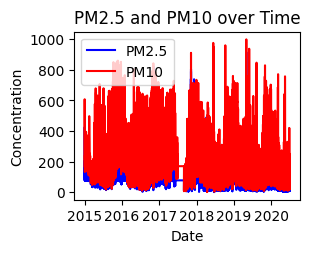

In [12]:
# Time Series Plots for PM2.5, PM10, NO, NO2, O3, CO
plt.subplot(2, 2, 1)
plt.plot(data['Date'], data['PM2.5'], label='PM2.5', color='blue')
plt.plot(data['Date'], data['PM10'], label='PM10', color='red')
plt.title('PM2.5 and PM10 over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()


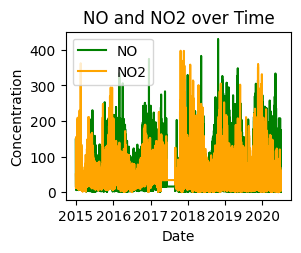

In [13]:
plt.subplot(2, 2, 2)
plt.plot(data['Date'], data['NO'], label='NO', color='green')
plt.plot(data['Date'], data['NO2'], label='NO2', color='orange')
plt.title('NO and NO2 over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()

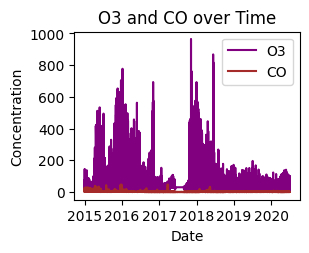

In [14]:
plt.subplot(2, 2, 3)
plt.plot(data['Date'], data['O3'], label='O3', color='purple')
plt.plot(data['Date'], data['CO'], label='CO', color='brown')
plt.title('O3 and CO over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()

In [15]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

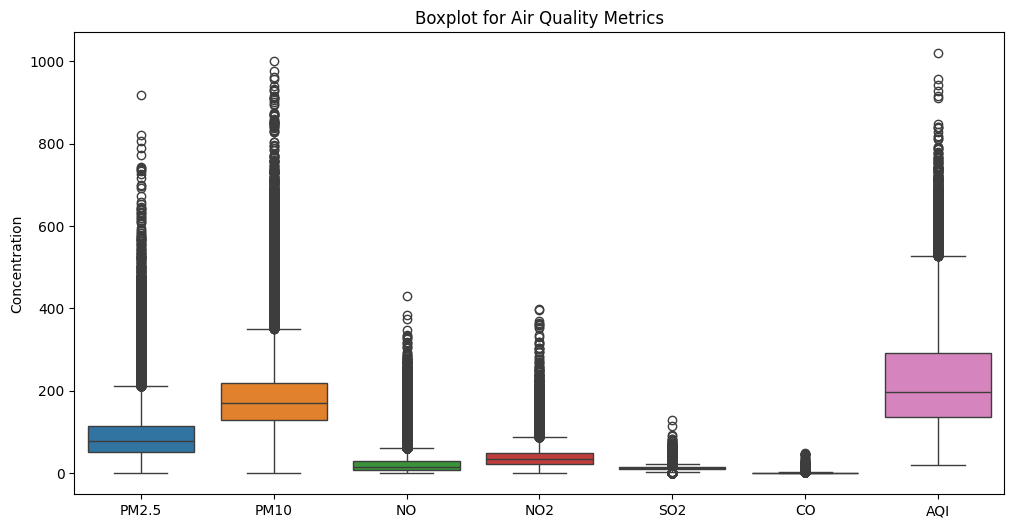

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['PM2.5', 'PM10', 'NO', 'NO2', 'SO2', 'CO', 'AQI']])
plt.title('Boxplot for Air Quality Metrics')
plt.ylabel('Concentration')
plt.show()

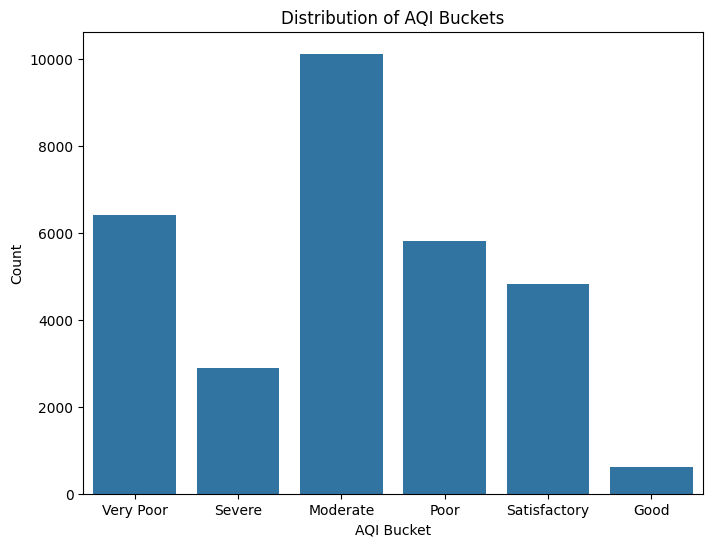

In [17]:
# AQI distribution (if you want to see how AQI is distributed in terms of buckets)
plt.figure(figsize=(8, 6))
sns.countplot(x='AQI_Bucket', data=data)
plt.title('Distribution of AQI Buckets')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.show()

# Exploratory Data Analysis (EDA)


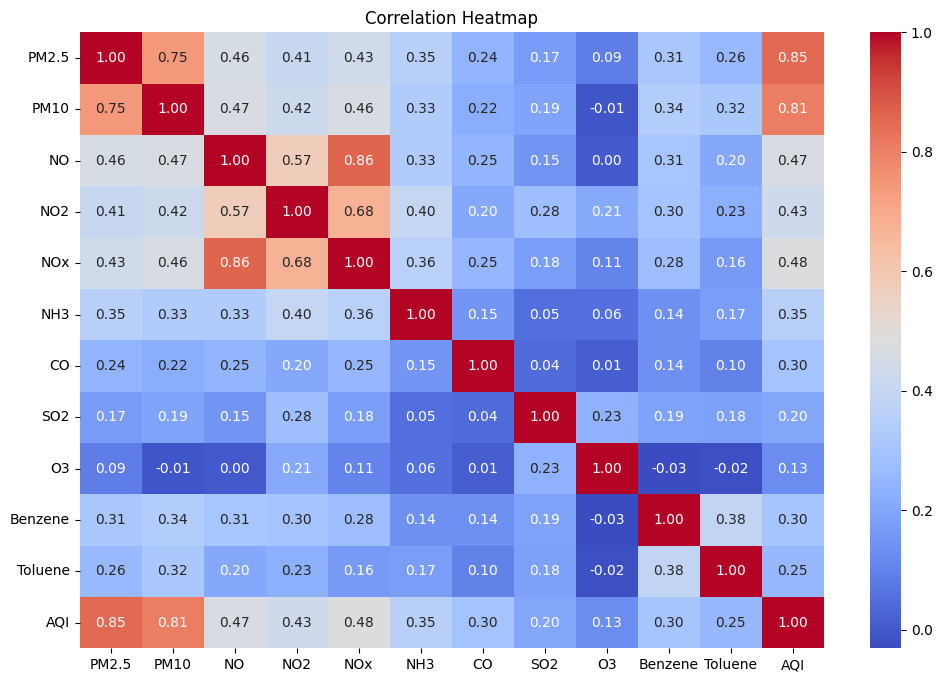

In [18]:
# Fix for correlation heatmap to handle non-numeric columns
def plot_correlation_heatmap(data):
    # Select only numeric columns for correlation
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    plt.figure(figsize=(12, 8))
    corr = numeric_data.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(data)


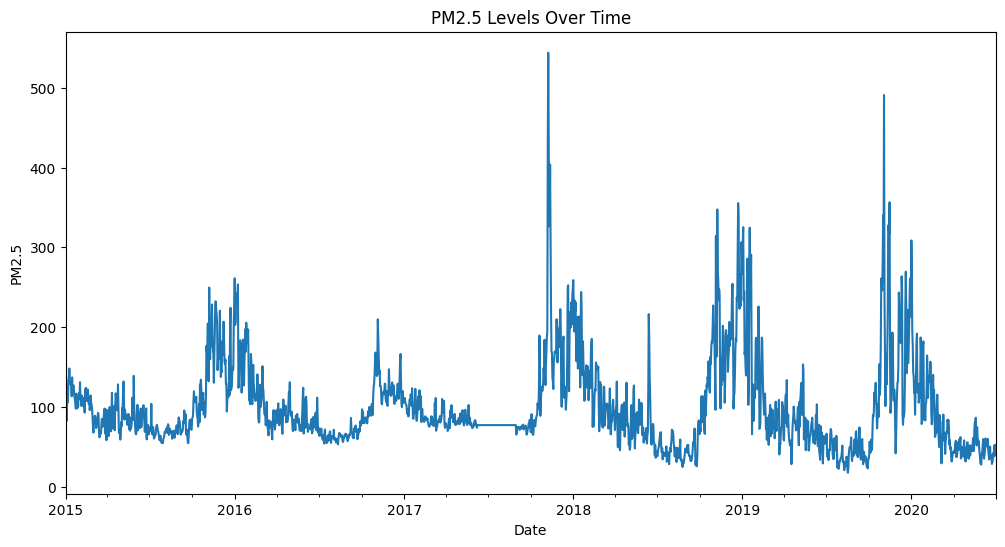

In [19]:

def plot_time_series(data, column, title):
    """Plots a time series for the specified column."""
    plt.figure(figsize=(12, 6))
    data.groupby('Date')[column].mean().plot()
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.show()

plot_time_series(data, 'PM2.5', 'PM2.5 Levels Over Time')


# Prepare Data for Modeling


In [20]:
# Prepare Data for Modeling
def prepare_data(data):
    """Prepares features and target variables for training and testing."""
    features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
    target = 'AQI'

    # Drop rows with missing values in features or target
    data = data.dropna(subset=features + [target])

    X = data[features]
    y = data[target]
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = prepare_data(data)


# Train a Random Forest Model

In [26]:
def train_model(X_train, y_train):
    """Trains a Random Forest Regressor model."""
    model = RandomForestRegressor(random_state=42, n_estimators=100)
    model.fit(X_train, y_train)
    return model

model = train_model(X_train, y_train)

# Evaluate the Model


In [28]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model_normalized(model, X_test, y_test):
    """Evaluates the model and prints normalized key metrics."""
    y_pred = model.predict(X_test)

    # Calculate raw metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate the range of the target variable
    y_range = np.max(y_test) - np.min(y_test)

    # Normalize metrics
    normalized_mae = mae / y_range
    normalized_mse = mse / (y_range ** 2)
    normalized_rmse = rmse / y_range

    # Print normalized metrics
    print("Mean Absolute Error (MAE):", normalized_mae)
    print("Mean Squared Error (MSE):", normalized_mse)
    print("Root Mean Squared Error (RMSE):", normalized_rmse)
    print("R-Squared (R2):", r2)  # No need to normalize as it is already between 0 and 1

evaluate_model_normalized(model, X_test, y_test)


Mean Absolute Error (MAE): 0.021537969500670964
Mean Squared Error (MSE): 0.0014762018743690324
Root Mean Squared Error (RMSE): 0.03842137262473885
R-Squared (R2): 0.8951738272831098


# Feature Importance

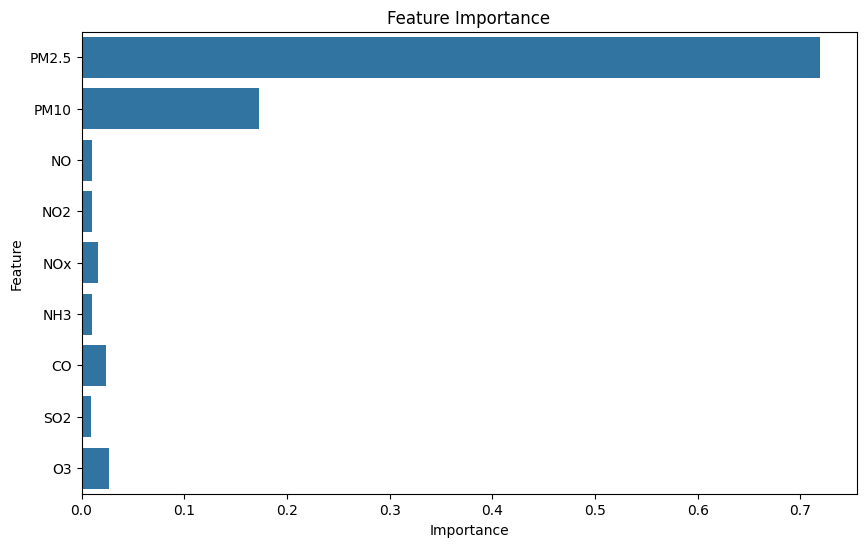

In [23]:
# Feature Importance
def plot_feature_importance(model, feature_names):
    """Plots feature importance for the trained model."""
    importance = model.feature_importances_
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance, y=feature_names)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

plot_feature_importance(model, X_train.columns)

In [24]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting model
def train_gradient_boosting_model(X_train, y_train):
    """Trains a Gradient Boosting Regressor model."""
    model = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=3)
    model.fit(X_train, y_train)
    return model

model_gb = train_gradient_boosting_model(X_train, y_train)

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    """Evaluates the model and prints key metrics."""
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Normalize MSE to be between 0 and 1
    y_range = np.max(y_test) - np.min(y_test)
    normalized_mse = mse / (y_range ** 2)

    print("Mean Absolute Error (MAE):", mae)
    print("Normalized Mean Squared Error (MSE):", normalized_mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-Squared (R2):", r2)

evaluate_model(model_gb, X_test, y_test)


Mean Absolute Error (MAE): 23.131957299909843
Normalized Mean Squared Error (MSE): 0.0015650985223164165
Root Mean Squared Error (RMSE): 39.28439681134967
R-Squared (R2): 0.8888612114183805


In [ ]:
from sklearn.linear_model import LinearRegression

def train_linear_regression_model(X_train, y_train):
    """Trains a Linear Regression model."""
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

model_lr = train_linear_regression_model(X_train, y_train)

def evaluate_model(model, X_test, y_test):
    """Evaluates the model and prints key metrics."""
    y_pred = model.predict(X_test)
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R-Squared (R2):", r2_score(y_test, y_pred))

evaluate_model(model_lr, X_test, y_test)


Mean Absolute Error (MAE): 34.506450462014264
Mean Squared Error (MSE): 3072.6299245511386
Root Mean Squared Error (RMSE): 55.43130816200479
R-Squared (R2): 0.8065351639741443


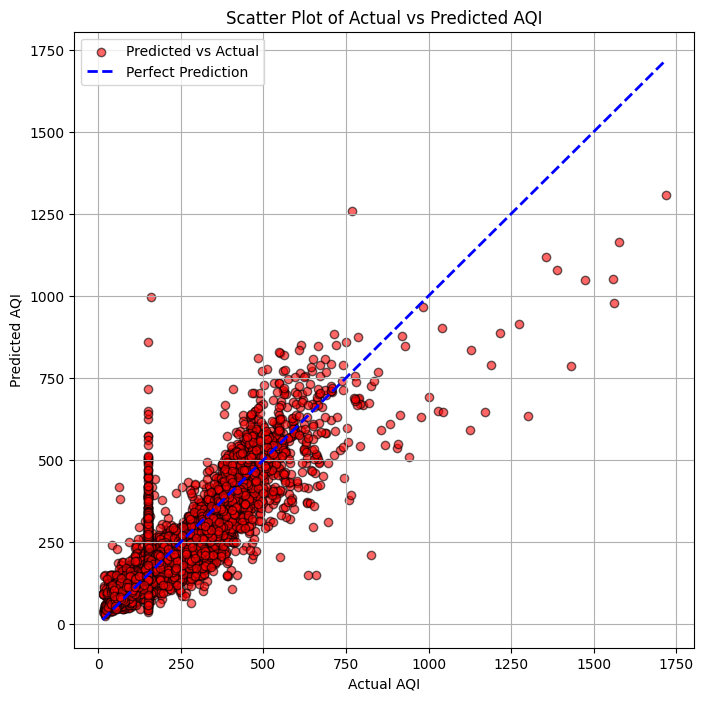

In [ ]:
def visualize_actual_vs_predicted(y_test, y_pred):
    """Visualizes actual vs predicted values as separate lines."""
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual AQI', color='blue', linewidth=2)
    plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted AQI', color='red', linestyle='--', linewidth=2)
    plt.title('Actual vs Predicted AQI')
    plt.xlabel('Sample Index')
    plt.ylabel('AQI')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to visualize predictions
visualize_actual_vs_predicted(y_test, model_lr.predict(X_test))


# Save the Cleaned Data and Model

In [ ]:
def save_outputs(data, model, data_path='cleaned_aqi_data.csv', model_path='aqi_prediction_model.pkl'):
    """Saves the cleaned dataset and trained model."""
    data.to_csv(data_path, index=False)
    joblib.dump(model, model_path)
    print("Cleaned data saved to:", data_path)
    print("Model saved to:", model_path)

save_outputs(data, model)

Cleaned data saved to: cleaned_aqi_data.csv
Model saved to: aqi_prediction_model.pkl


In [ ]:
import joblib
print("Pipeline complete: Data cleaning, visualization, modeling, and evaluation.")

Pipeline complete: Data cleaning, visualization, modeling, and evaluation.


In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('aqi_prediction_model.pkl')

# Define a function to make predictions using the trained model
def predict_aqi(PM2_5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3):
    """Predict AQI based on the input features using the trained model."""
    # Create a DataFrame with the input features
    input_data = pd.DataFrame([[PM2_5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3]],
                              columns=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3'])

    # Make the prediction using the model
    predicted_aqi = model.predict(input_data)[0]
    return predicted_aqi

# Define the Gradio interface with the new syntax
inputs = [
    gr.Number(label='PM2.5'),
    gr.Number(label='PM10'),
    gr.Number(label='NO'),
    gr.Number(label='NO2'),
    gr.Number(label='NOx'),
    gr.Number(label='NH3'),
    gr.Number(label='CO'),
    gr.Number(label='SO2'),
    gr.Number(label='O3')
]

outputs = gr.Textbox(label="Predicted AQI")

# Create the interface
gr.Interface(fn=predict_aqi, inputs=inputs, outputs=outputs, title="AQI Prediction",
             description="Enter the values of air pollutants to predict AQI").launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2e593d94bc2405399b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
